In [1]:
#importing lib's to get the certain outputs.

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("SBI_Life_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [3]:
df.shape

(1338, 8)

In [4]:
#null values checking

df.isnull()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False


In [5]:
#lets find out the null values in data or not
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
#checking the datatypes

df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [7]:
#ckecking the column/keys in dataset

df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [8]:
#finding the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [9]:
#finding the correlation matrix
#Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj) and from left to right diagonal value will be same.

dfcor = df.corr()
dfcor


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [10]:
#statistics representation for count,mean,std,min , max level.

df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


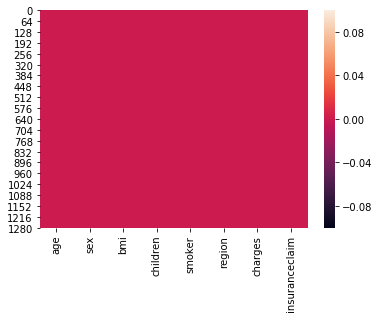

In [11]:
# heatmap of null value
sns.heatmap(df.isnull())

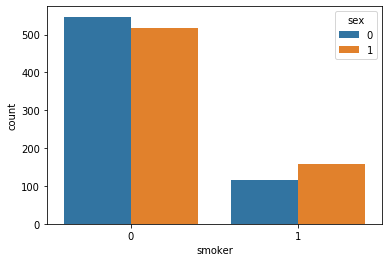

In [12]:
#checking count of smokers and none smoker along the gender
#non-smoke=0;smoker=1
sns.countplot(x=df['smoker'],data=df,hue='sex')

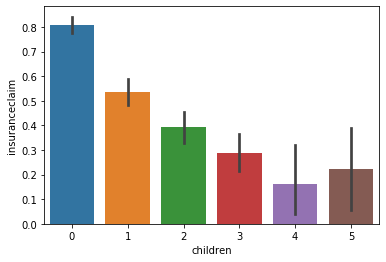

In [13]:
# insuranceclaimed by policyholder as per number of children

sns.barplot(x='children',y='insuranceclaim',data=df)

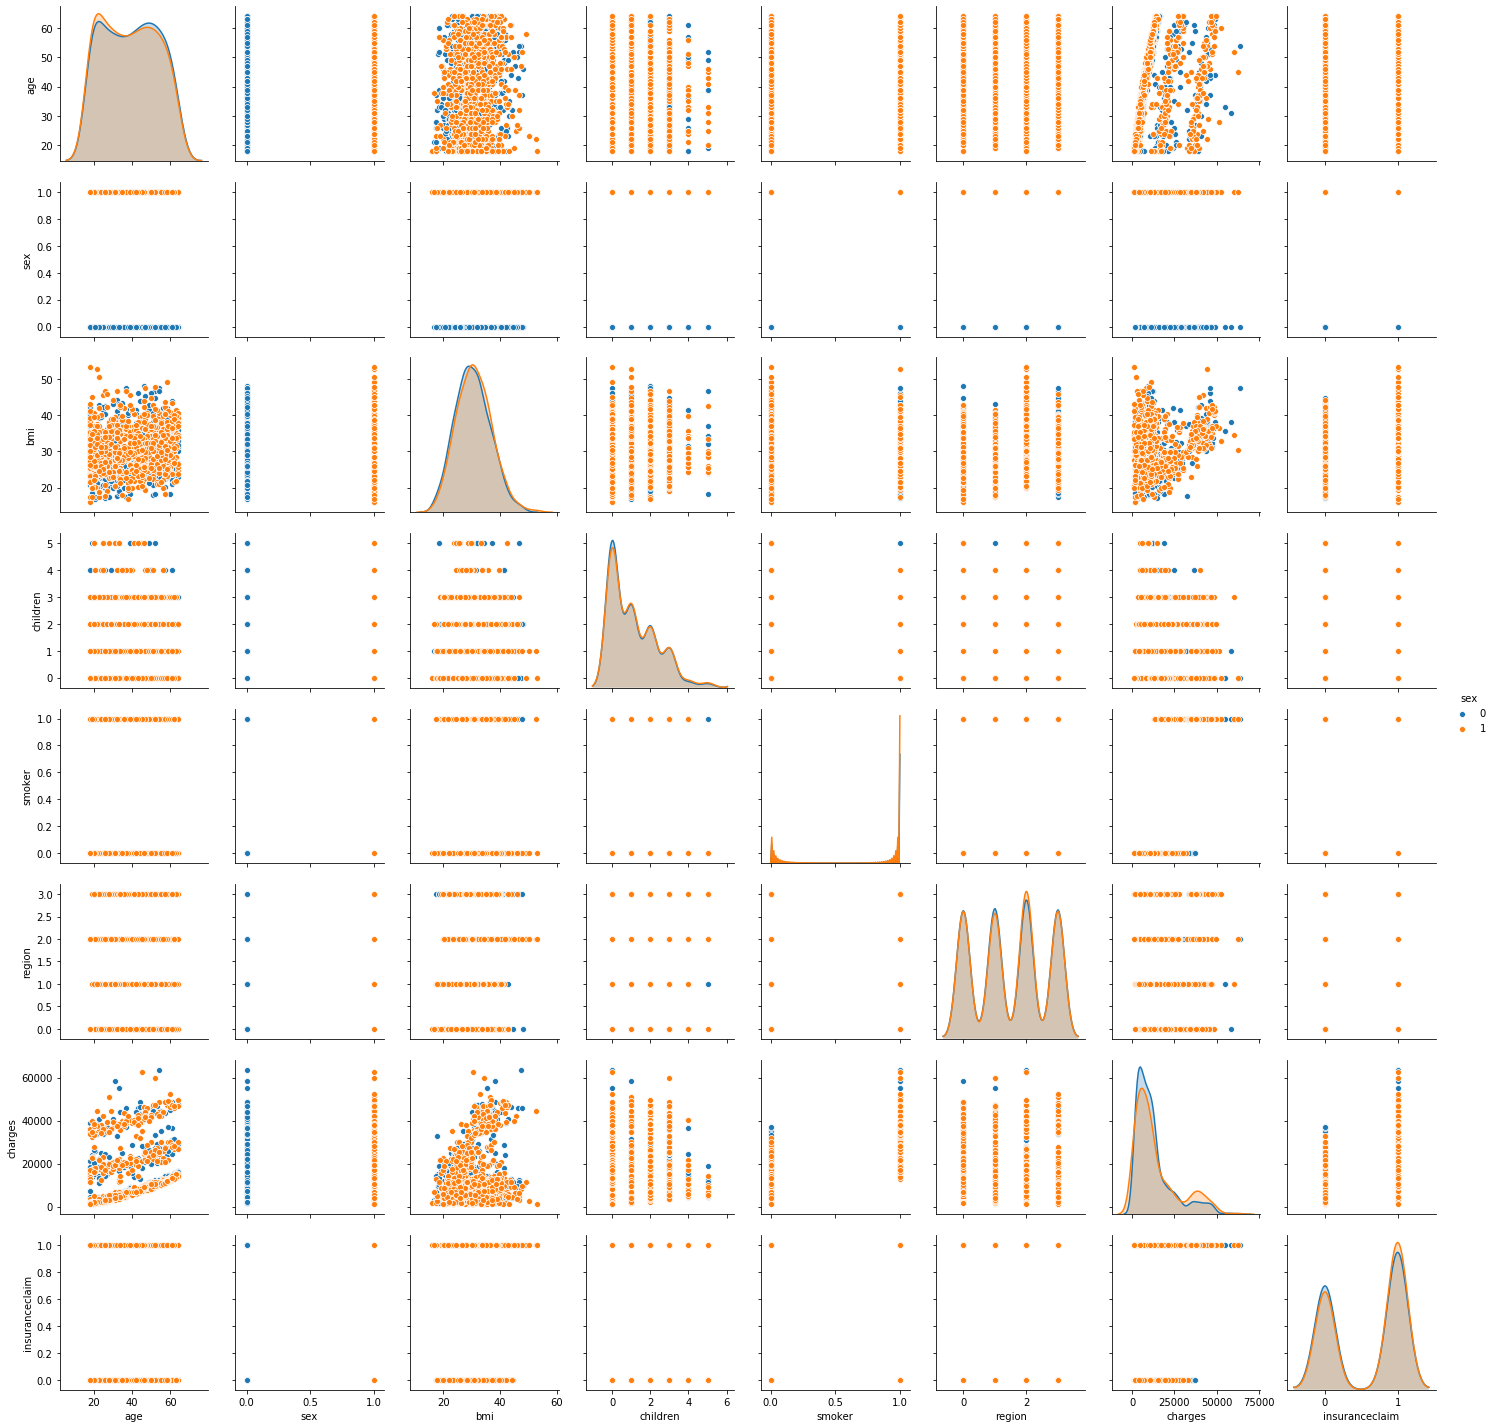

In [14]:
# pair plot to see the scatter of data using gender as hue for clear understanding
sns.pairplot(df, hue='sex')

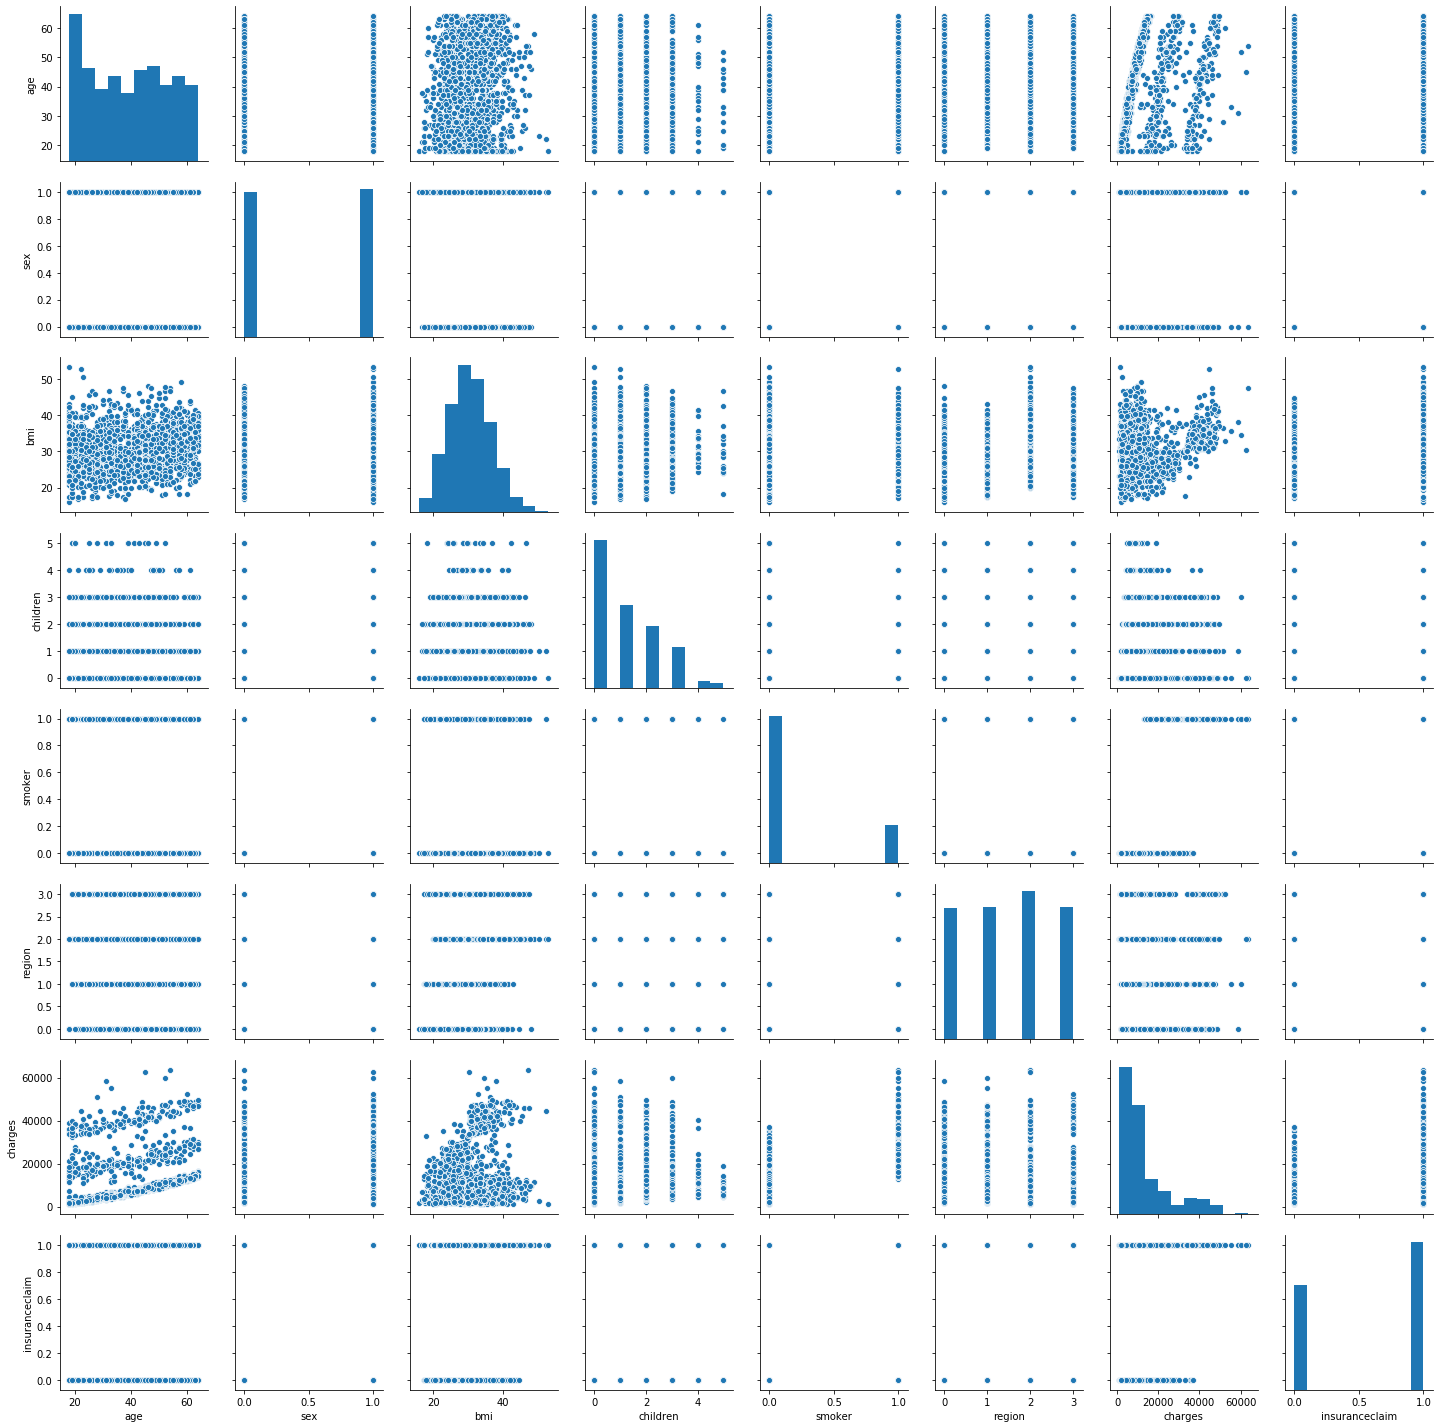

In [15]:
#Lets Check the pairplot using seaborn Library

sns.pairplot(df)
plt.show()

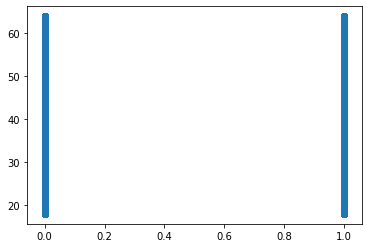

In [16]:
plt.scatter(df["sex"],df["age"])

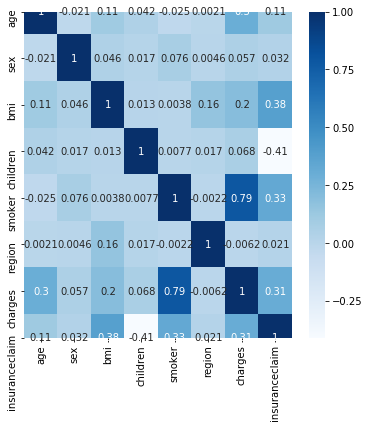

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

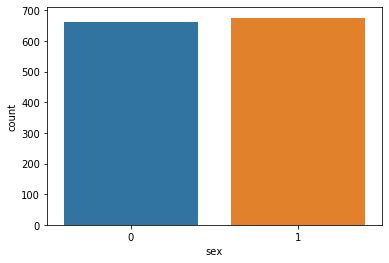

In [18]:
#checking the count of male and female in a dataset.
sns.countplot(x=df['sex'],data=df)

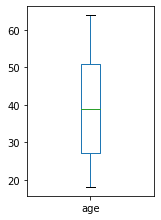

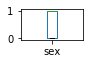

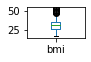

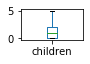

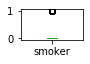

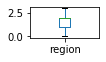

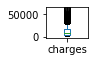

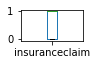

In [19]:
#Plotting Boxplot through Iterations

plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

In [20]:
#checking skewness
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [21]:
#removing skewness
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.cbrt(df[col])
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children         -0.097116
smoker            1.464766
region           -0.038101
charges           0.515183
insuranceclaim   -0.346254
dtype: float64

In [22]:
#removing outlires
import joblib
from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)


df.shape: (1338, 8)
df1.shape: (1334, 8)
z value is: [[1.43876426 1.0105187  0.45332    ... 1.34390459 0.59249575 0.84190989]
 [1.50996545 0.98959079 0.5096211  ... 0.43849455 1.47520096 0.84190989]
 [0.79795355 0.98959079 0.38330685 ... 0.43849455 0.80113212 1.18777557]
 ...
 [1.50996545 1.0105187  1.0148781  ... 0.43849455 1.5094114  0.84190989]
 [1.29636188 1.0105187  0.79781341 ... 1.34390459 1.38112147 1.18777557]
 [1.55168573 1.0105187  0.26138796 ... 0.46691549 1.36723348 0.84190989]]


In [23]:
threshold=3
print(np.where(z>3))

(array([ 116,  847, 1047, 1317], dtype=int64), array([2, 2, 2, 2], dtype=int64))


In [24]:
df[2:5]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,1.44225,0.0,2,16.447599,0
3,33,1,22.705,0.00000,0.0,1,28.013799,0
4,32,1,28.880,0.00000,0.0,1,15.695891,1


In [25]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0.00000,1.0,3,25.654666,1
1,18,1,33.770,1.00000,0.0,2,11.994331,1
2,28,1,33.000,1.44225,0.0,2,16.447599,0
3,33,1,22.705,0.00000,0.0,1,28.013799,0
4,32,1,28.880,0.00000,0.0,1,15.695891,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,1.44225,0.0,1,21.967271,0
1334,18,0,31.920,0.00000,0.0,0,13.017690,1
1335,18,0,36.850,0.00000,0.0,2,11.768318,1
1336,21,0,25.800,0.00000,0.0,3,12.615872,0


In [26]:
df_new=df[(z<3).all(axis=1)]

In [27]:
df.shape

(1338, 8)

In [28]:
df_new.shape

(1334, 8)

In [29]:
df=df_new
df.shape

(1334, 8)

In [30]:
x=df.iloc[:,0:-1]
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.00000,1.0,3,25.654666
1,18,1,33.770,1.00000,0.0,2,11.994331
2,28,1,33.000,1.44225,0.0,2,16.447599
3,33,1,22.705,0.00000,0.0,1,28.013799
4,32,1,28.880,0.00000,0.0,1,15.695891


In [31]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [32]:
x.shape

(1334, 7)

In [33]:
y.shape

(1334,)

In [34]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.33,random_state=50)

In [36]:
train_x.shape

(893, 7)

In [37]:
train_x.shape

(893, 7)

In [38]:
test_y.shape

(441,)

In [39]:
test_y.shape

(441,)

In [40]:
# in log regression we have to perform the metrics like confusion matrix,accuracy score and classification report

lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
pred=lg.predict(test_x)
print(pred)

[1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0
 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0]


In [42]:
print("accuracy score:",accuracy_score(pred,test_y))

print("---------\n")

print("confusion_matrix:\n",confusion_matrix(test_y,pred))

print("---------\n")

print("classification_report:\n",classification_report(test_y,pred))

accuracy score: 0.8299319727891157
---------

confusion_matrix:
 [[137  46]
 [ 29 229]]
---------

classification_report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       183
           1       0.83      0.89      0.86       258

    accuracy                           0.83       441
   macro avg       0.83      0.82      0.82       441
weighted avg       0.83      0.83      0.83       441



In [44]:
#Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

from sklearn.model_selection import cross_val_score
accuracy_mcv1 = cross_val_score(lg,x,y,cv=10,scoring='accuracy').mean()
accuracy_scv1=cross_val_score(lg,x,y,cv=10,scoring='accuracy').std()

print('mean score:',accuracy_mcv1)
print('std score:',accuracy_scv1)

mean score: 0.8358186851116939
std score: 0.025470673916333304


In [46]:
#@ cv=20
accuracy_mcv1 = cross_val_score(lg,x,y,cv=20,scoring='accuracy').mean()
accuracy_scv1=cross_val_score(lg,x,y,cv=20,scoring='accuracy').std()
print('mean score:',accuracy_mcv1)
print('std scoere:',accuracy_scv1)

mean score: 0.8380329123612705
std scoere: 0.037174852921693535


In [52]:
##Grid Search Cross Validation for Logistic Regression

from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=5)
lg1_cv.fit(train_x,train_y)

print("tuned hpyerparameters :(best_parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_) 

print('--------------\n')
lg2=LogisticRegression(C=1,penalty="l2")
lg2.fit(train_x,train_y)
print("score",lg2.score(test_x,test_y))

tuned hpyerparameters :(best_parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.8425492033739457
--------------

score 0.8352059925093633


In [53]:
#creating models array with all the model, along with few blank array for further use
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
f1_score,roc_curve,log_loss)



Model_array=[]
Random_state=[]
Max_accuracy_array=[]
Cross_val_score_array=[]
Standard_Deviation=[]
Models=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [54]:
for name,model in Models:
    max_accuracy=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,stratify=y,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        accuracy=accuracy_score(test_y,pred)
        
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_accuracy_array.append(max_accuracy)

In [55]:
# comparing the performances of all the model on accuracy basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'Accuracy': Max_accuracy_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Random state
5,GradientBoostingClassifier,1.000000,97
4,DecisionTreeClassifier,0.996255,36
7,RandomForestClassifier,0.973783,46
9,QuadraticDiscriminantAnalysis,0.902622,96
3,LogisticRegression,0.895131,93
0,SVC,0.891386,51
6,LinearDiscriminantAnalysis,0.883895,68
2,SGDClassifier,0.876404,68
8,KNeighborsClassifier,0.846442,97
1,GaussianNB,0.835206,39


Model score is: 1.0 

Accuracy score of model is :  0.9812734082397003 

Precision score of model is : 0.9808917197452229 

Recall score of model is : 0.9871794871794872 

Log loss score of model is : 0.6468025496885551 

F1_score score of model is : 0.9840255591054313 

The mean of cross_val_score for themodel is: 0.9709474986166715 

Confusion matrix for themodel is : 
 [[108   3]
 [  2 154]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       111
           1       0.98      0.99      0.98       156

    accuracy                           0.98       267
   macro avg       0.98      0.98      0.98       267
weighted avg       0.98      0.98      0.98       267
 



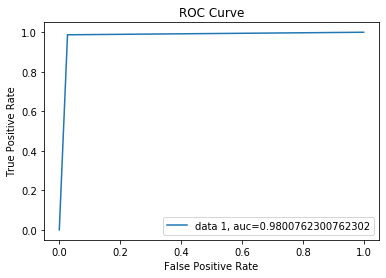

In [59]:
DC=DecisionTreeClassifier(random_state=10)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=25,stratify=y,shuffle=True)
DC.fit(train_x,train_y)
pred=DC.predict(test_x)
predict_proba = DC.predict_proba(test_x)[::,1]
score=cross_val_score(DC,train_x,train_y,cv=14,scoring='accuracy').mean()

print('Model score is:',DC.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('Precision score of model is :',precision_score(test_y, pred),'\n')
print('Recall score of model is :',recall_score(test_y, pred),'\n')
print('Log loss score of model is :',log_loss(test_y, pred),'\n')
print('F1_score score of model is :',f1_score(test_y, pred),'\n')
print('The mean of cross_val_score for themodel is:',score,'\n')
print('Confusion matrix for themodel is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

fpr, tpr, thresholds  = roc_curve(test_y,  predict_proba)
auc = roc_auc_score(test_y, predict_proba)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [62]:
#to save this model using joblib

from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(DC, 'sbi_pred.pkl')

['sbi_pred.pkl']